In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [1]:
names = ['vae', "beta_vae", "beta_iaf_vae", "dc_beta_iaf_vae", "dc_iaf_diva"]
coolnames = ['VAE', r"$\beta$-VAE", r"$\beta$-IAF-VAE", r"DC-$\beta$-IAF-VAE", "DC-IAF-DIVA"]
cs = ['red', 'green', 'blue', 'yellow', 'purple']
lims = [200,200,150,150,200]

In [2]:
#, nrows=100)

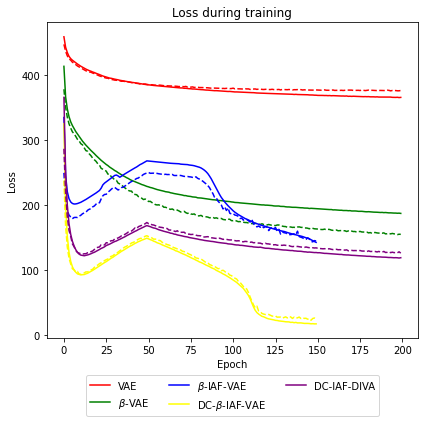

In [5]:
df = pd.read_csv('loss/loss.csv')
plt.figure(figsize=(6,6))
for i in zip(names,cs,coolnames,lims):
    plt.plot(df[f'{i[0]}_test'][:i[3]].astype(float),c=i[1],ls='--')
    plt.plot(df[f'{i[0]}_train'][:i[3]].astype(float),c=i[1], label=i[2])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss during training")
plt.legend(ncol=3, fontsize=10, loc='upper center',
                               bbox_to_anchor=(0.5, -0.1), 
                               fancybox=True)
plt.tight_layout()
plt.savefig('figures/loss.png')

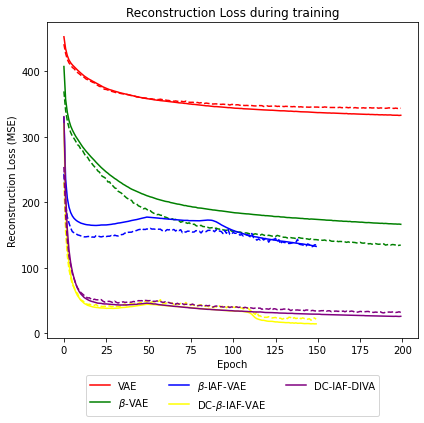

In [6]:
df = pd.read_csv('loss/reconstruction_loss.csv')
plt.figure(figsize=(6,6))
for i in zip(names,cs,coolnames,lims):
    plt.plot(df[f'{i[0]}_train'][:i[3]].astype(float),c=i[1], label=i[2])
    plt.plot(df[f'{i[0]}_test'][:i[3]].astype(float),c=i[1],ls='--')
    
plt.xlabel("Epoch")
plt.ylabel("Reconstruction Loss (MSE)")
plt.title("Reconstruction Loss during training")
plt.legend(ncol=3, fontsize=10, loc='upper center',
                               bbox_to_anchor=(0.5, -0.1), 
                               fancybox=True)
plt.tight_layout()
plt.savefig('figures/rloss.png')

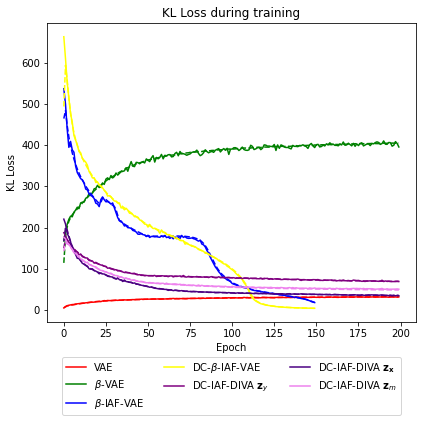

In [7]:
df = pd.read_csv('loss/kl_loss.csv')
plt.figure(figsize=(6,6))
for i in zip(names,cs,coolnames,lims):
    if i[0] == "dc_iaf_diva":
        plt.plot(df[f'{i[0]}_y_test'][:i[3]].astype(float),c='purple', label=i[2]+r" $\mathbf{z}_y$")
        plt.plot(df[f'{i[0]}_y_train'][:i[3]].astype(float),c='purple',ls='--')
        plt.plot(df[f'{i[0]}_x_test'][:i[3]].astype(float),c='indigo', label=i[2]+r" $\mathbf{z_x}$")
        plt.plot(df[f'{i[0]}_x_train'][:i[3]].astype(float),c='indigo',ls='--')
        plt.plot(df[f'{i[0]}_m_test'][:i[3]].astype(float),c='violet', label=i[2]+r" $\mathbf{z}_m$")
        plt.plot(df[f'{i[0]}_m_train'][:i[3]].astype(float),c='violet',ls='--')
    else:
        
        plt.plot(df[f'{i[0]}_test'][:i[3]].astype(float),c=i[1], label=i[2])
        plt.plot(df[f'{i[0]}_train'][:i[3]].astype(float),c=i[1],ls='--')
    
plt.xlabel("Epoch")
plt.ylabel("KL Loss")
plt.title("KL Loss during training")
plt.legend(ncol=3, fontsize=10, loc='upper center',
                               bbox_to_anchor=(0.5, -0.1), 
                               fancybox=True)
plt.tight_layout()
plt.savefig('figures/klloss.png')